In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score, recall_score,
    f1_score, roc_auc_score, log_loss, classification_report, roc_curve
)

In [ ]:
# Carregar a base de dados
df = pd.read_csv('base.csv')

# Remover coluna de risco descritivo se existir
df = df.drop(columns=['descricao_risco'], errors='ignore')

# Definir as colunas de interesse com base em regras estratégicas
colunas = [
    'age_dummy',             # Faixa etária
    'salary_dummy',          # Faixa salarial
    'total_loans_dummy',     # Total de empréstimos
    'more_90_days_dummy',    # Histórico de atrasos >90 dias
    'using_lines_dummy',     # Uso das linhas de crédito
    'debt_ratio_dummy'       # Índice de endividamento
]

target = 'default_flag'

# Separar variáveis preditoras (X) e alvo (y)
X = df[colunas]
y = df[target]


In [ ]:
# Separar base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [ ]:
# Instanciar e treinar modelo de Regressão Logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
# Previsões
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Métricas de avaliação
print("=== Avaliação do Modelo ===")
print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precisão: {precision_score(y_test, y_pred):.4f}")
print(f"Revocação: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob):.4f}")
print(f"Log-Loss: {log_loss(y_test, y_prob):.4f}")
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred))


=== Avaliação do Modelo ===
Acurácia: 0.9826
Precisão: 0.0000
Revocação: 0.0000
F1-Score: 0.0000
AUC-ROC: 0.9481
Log-Loss: 0.0520

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10612
           1       0.00      0.00      0.00       188

    accuracy                           0.98     10800
   macro avg       0.49      0.50      0.50     10800
weighted avg       0.97      0.98      0.97     10800



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

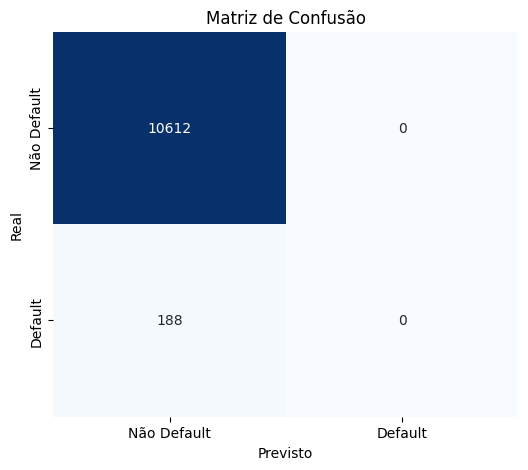

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Não Default', 'Default'], yticklabels=['Não Default', 'Default'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


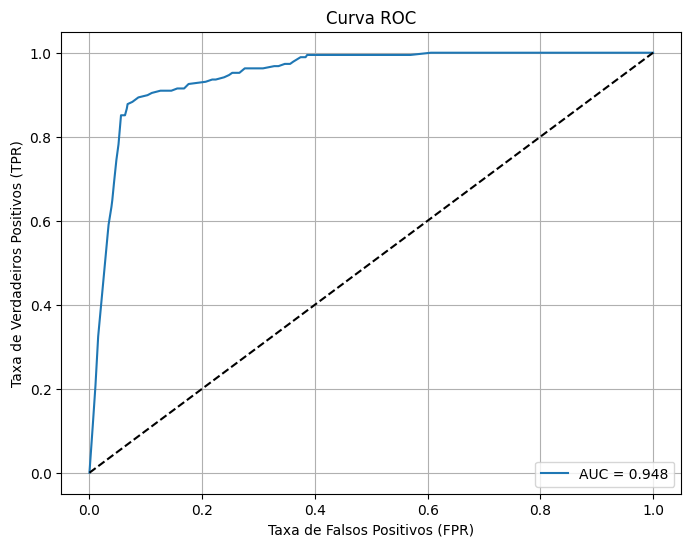

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob):.3f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
# Validação cruzada utilizando AUC-ROC como métrica
cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print(f"Validação Cruzada (5 folds) - AUC-ROC médio: {cv_scores.mean():.4f} (std: {cv_scores.std():.4f})")


Validação Cruzada (5 folds) - AUC-ROC médio: 0.9478 (std: 0.0132)


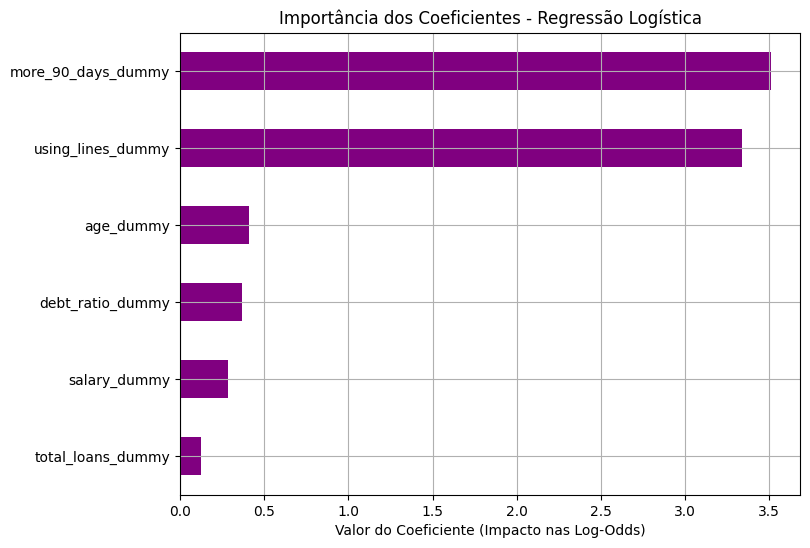

In [ ]:
# Avaliação da importância relativa das variáveis
coef = pd.Series(model.coef_[0], index=colunas).sort_values()
plt.figure(figsize=(8,6))
coef.plot(kind='barh', color='purple')
plt.title('Importância dos Coeficientes - Regressão Logística')
plt.xlabel('Valor do Coeficiente (Impacto nas Log-Odds)')
plt.grid(True)
plt.show()
